In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from collections import Counter

In [2]:
def plotImage(image):
    plt.imshow(image,cmap='gray',vmin=0,vmax=255)
    plt.show()
    plt.hist(image.ravel(),256,[0,256])
    plt.show()
    
def getProbabilities(pixelValuesCount,pixels):
    probabilities=[]
    for i in range(256):
        probabilities.append(pixelValuesCount[i] / pixels)
    return probabilities

def getCDF(probs): #probabilities
    cdf=[]
    cdf.append(probs[0])
    for i in range(1,len(probs)):
        cdf.append(cdf[i-1]+probs[i])
    return cdf

def getLCDF(cdf,bits):
    L_cdf=[]
    gray_levels=2**bits - 1
    for i in cdf:
        L_cdf.append(i*gray_levels)
    return L_cdf

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

### Input image

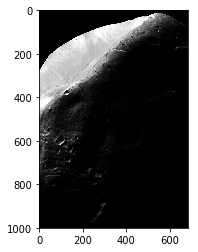

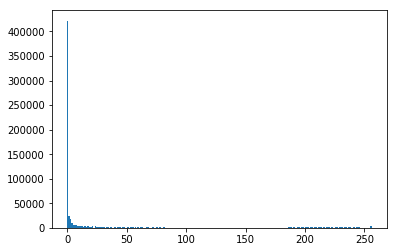

#pixels: 683000


In [3]:
img = cv2.imread('Q2-input image.tif',0)
plotImage(img)

n=8 #bits
gray_levels=2**n - 1

pixelsCount=img.shape[0]*img.shape[1]
print('#pixels:',pixelsCount)

### probabilities, CDF, L_CDF for Input image

In [4]:
input_pixelCounter=Counter(img.ravel()) #each pixelValue counter

prob_input=getProbabilities(input_pixelCounter,pixelsCount)
cdf_input=getCDF(prob_input)
L_cdf_input=getLCDF(cdf_input,n)

### New Random Image

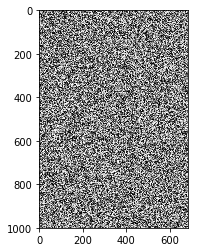

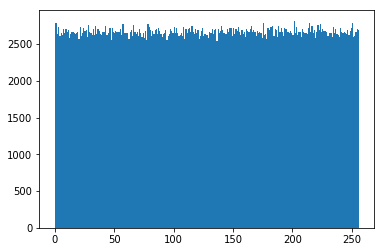

In [5]:
new_img = np.random.randint(low=0,high=256,size=(img.shape[0],img.shape[1]))

plotImage(new_img)

### probabilities, CDF, L_CDF for New Random image

In [6]:
newRandomImg_pixelCounter=Counter(new_img.ravel()) #each pixelValue counter

prob_newRandomImg=getProbabilities(newRandomImg_pixelCounter,pixelsCount)
cdf_newRandomImg=getCDF(prob_newRandomImg)
L_cdf_newRandomImg=getLCDF(cdf_newRandomImg,n)

### output matching

In [7]:
output_pixel=[]
for i in L_cdf_input:
    output_pixel.append(find_nearest(L_cdf_newRandomImg,i))

#rounding
for i in range(len(output_pixel)):
    output_pixel[i]=int(round(output_pixel[i]))

In [8]:
output_img=[]
for x in img.ravel():
    i=output_pixel[x]
    output_img.append(i)
    
output_img=np.asarray(output_img)
output_img=output_img.reshape(img.shape[0],img.shape[1])

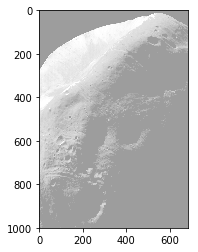

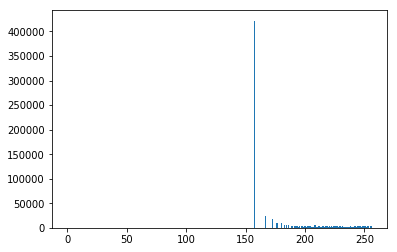

In [9]:
plotImage(output_img)